In [ ]:
%pip list

In [6]:
%pip install pyspark

  Using cached pyspark-4.0.0-py2.py3-none-any.whl
  Using cached py4j-0.10.9.9-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached py4j-0.10.9.9-py2.py3-none-any.whl (203 kB)

   ---------------------------------------- 0/2 [py4j]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   ------------

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Charger le fichier CSV avec parsing de la date
dfFull = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", parse_dates=["CMPLNT_TO_DT"])



C:\Users\jomat\AppData\Local\Temp\ipykernel_2720\3776775349.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dfFull = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", parse_dates=["CMPLNT_TO_DT"])


In [30]:
# 2. Vérifier le contenu
print(dfFull.head())


  CMPLNT_NUM  ADDR_PCT_CD BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0  306735347           47   BRONX   05/20/2025     16:00:00   2025-05-20   
1  309112063           47   BRONX   04/05/2025     02:10:00   2025-04-05   
2  305684451           44   BRONX   05/01/2025     14:20:00          NaT   
3  298927491           43   BRONX   01/04/2025     08:00:00          NaT   
4  308875141           47   BRONX   06/28/2025     13:00:00          NaT   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0     16:30:00        COMPLETED     (null)          NaN  ...   
1     02:20:00        COMPLETED     (null)          NaN  ...   
2       (null)        COMPLETED     (null)          NaN  ...   
3       (null)        COMPLETED     (null)          NaN  ...   
4       (null)        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP  VIC_RACE VIC_SEX X_COORD_CD Y_COORD_CD  \
0               NaN         25-44     BLACK       M          0          0   
1   

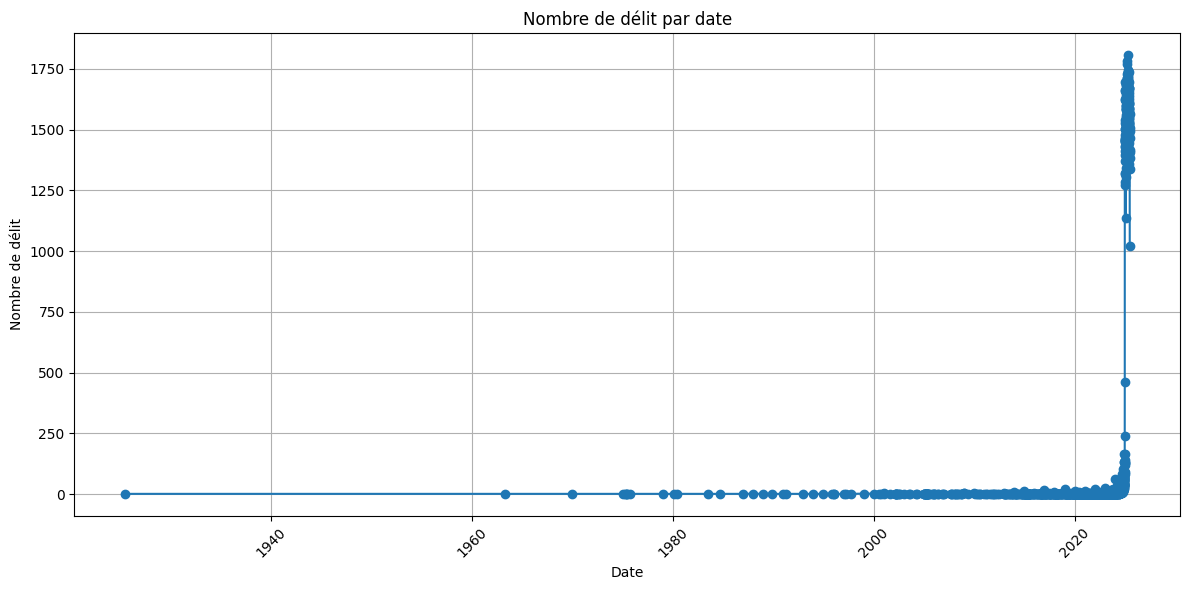

In [44]:
# Conversion avec gestion des erreurs
dfFull["CMPLNT_FR_DT"] = pd.to_datetime(dfFull["CMPLNT_FR_DT"], errors='coerce')

# Supprimer les lignes avec des dates invalides
df = dfFull.dropna(subset=["CMPLNT_FR_DT"])

# Grouper, trier et tracer comme avant
df_grouped = df.groupby("CMPLNT_FR_DT").size().reset_index(name="BORO_NM")
df_grouped = df_grouped.sort_values("CMPLNT_FR_DT")

plt.figure(figsize=(12, 6))
plt.plot(df_grouped["CMPLNT_FR_DT"], df_grouped["BORO_NM"], marker='o')
plt.xlabel("Date")
plt.ylabel("Nombre de délit")
plt.title("Nombre de délit par date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


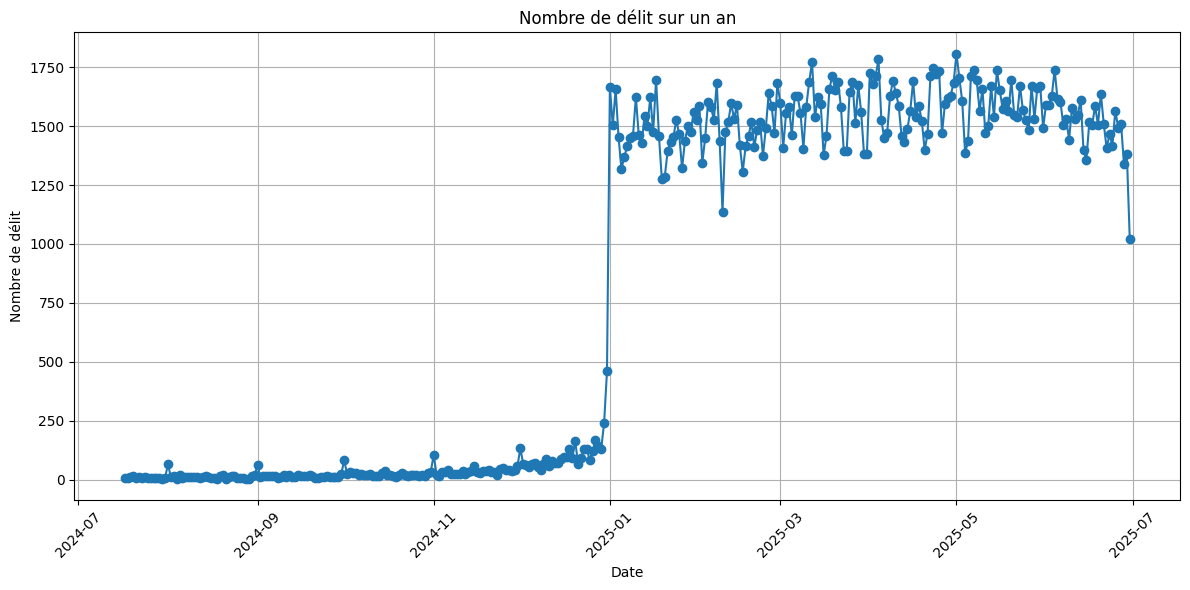

In [45]:
debut = "2024-07-17"
fin = "2025-07-17"

# Assurez-vous que c'est bien une colonne datetime
dfFull["CMPLNT_FR_DT"] = pd.to_datetime(dfFull["CMPLNT_FR_DT"], errors='coerce')

# Appliquer le filtre
df_filtré = dfFull[(dfFull["CMPLNT_FR_DT"] >= debut) & (dfFull["CMPLNT_FR_DT"] <= fin)]

# Grouper et compter
df_grouped = df_filtré.groupby("CMPLNT_FR_DT").size().reset_index(name="BORO_NM")

# Trier (important pour le graphique)
df_grouped = df_grouped.sort_values("CMPLNT_FR_DT")

# Afficher le graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_grouped["CMPLNT_FR_DT"], df_grouped["BORO_NM"], marker='o')
plt.xlabel("Date")
plt.ylabel("Nombre de délit")
plt.title("Nombre de délit sur un an")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

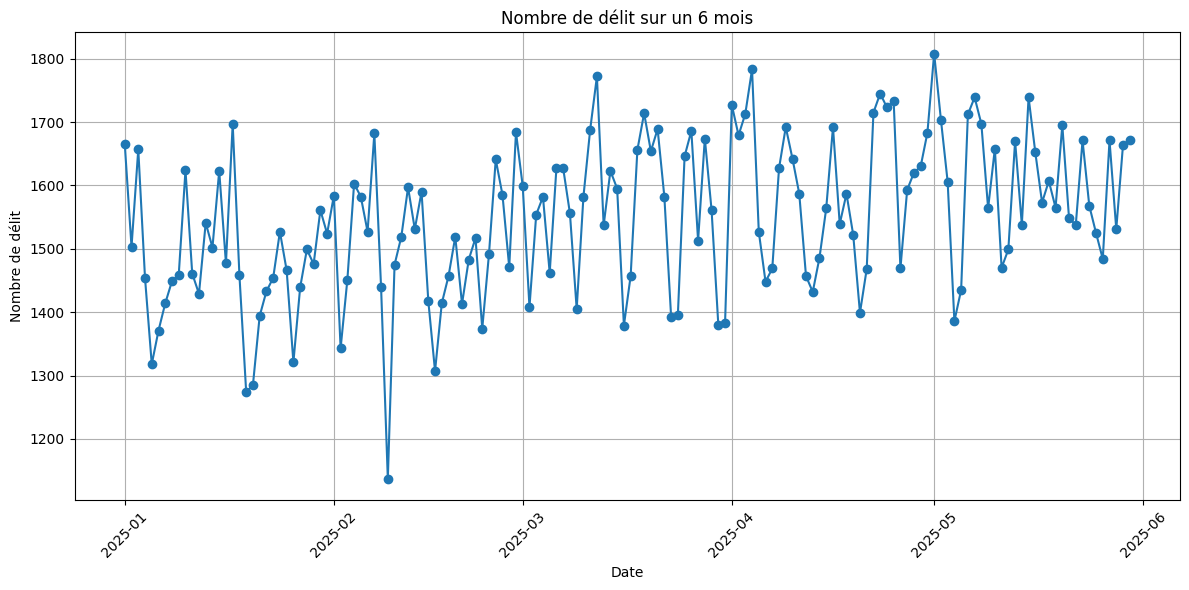

In [46]:
debut = "2025-01-01"
fin = "2025-05-30"

# Assurez-vous que c'est bien une colonne datetime
dfFull["CMPLNT_FR_DT"] = pd.to_datetime(dfFull["CMPLNT_FR_DT"], errors='coerce')

# Appliquer le filtre
df_filtré = dfFull[(dfFull["CMPLNT_FR_DT"] >= debut) & (dfFull["CMPLNT_FR_DT"] <= fin)]

# Grouper et compter
df_grouped = df_filtré.groupby("CMPLNT_FR_DT").size().reset_index(name="BORO_NM")

# Trier (important pour le graphique)
df_grouped = df_grouped.sort_values("CMPLNT_FR_DT")

# Afficher le graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_grouped["CMPLNT_FR_DT"], df_grouped["BORO_NM"], marker='o')
plt.xlabel("Date")
plt.ylabel("Nombre de délit")
plt.title("Nombre de délit sur un 6 mois")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [34]:
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors='coerce')
df = df.dropna(subset=["CMPLNT_FR_DT"])

# Extraire le mois comme cible
df["mois"] = df["CMPLNT_FR_DT"].dt.month

# Garder les colonnes pertinentes (tu peux en ajouter d'autres)
features = ["BORO_NM", "CRM_ATPT_CPTD_CD", "VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX", "CMPLNT_FR_TM"]
df = df.dropna(subset=features)

X = df[features]
y = df["mois"]


C:\Users\jomat\AppData\Local\Temp\ipykernel_2720\2367419160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors='coerce')


In [15]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --------------- ------------------------ 3.4/8.7 MB 18.3 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 18.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/38.4 MB 22.3 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/38.4 MB 22.5 MB/s eta 0:00:02
   -------------- ------------------------- 13.9/38.4 MB 21.8 MB/s eta 0:00:02
   ------------------- -------------------- 19.1/38.4 MB 22.4 MB/s eta 0:00:01
   ------------------------- -------------- 24.4/38.4 MB 22.7 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.4 MB 23.0 MB/s eta 0:00:01
   ------------------------------------ --- 34.6/38.4 MB 23.1 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 22.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd

# Chargement du dataset
df = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", parse_dates=["CMPLNT_FR_DT"], low_memory=False)

# Garder uniquement les lignes avec données valides
df = df.dropna(subset=["VIC_AGE_GROUP", "BORO_NM", "CRM_ATPT_CPTD_CD", "VIC_RACE", "VIC_SEX", "CMPLNT_FR_TM"])

# Définir les features et la cible
X = df[["BORO_NM", "CRM_ATPT_CPTD_CD", "VIC_RACE", "VIC_SEX", "CMPLNT_FR_TM"]]
y = df["VIC_AGE_GROUP"]



In [36]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
       18-24       0.13      0.04      0.06      4197
       25-44       0.50      0.77      0.61     18708
       45-64       0.26      0.15      0.19      9398
         65+       0.11      0.03      0.05      2864
         <18       0.14      0.05      0.07      2147
     UNKNOWN       0.97      0.97      0.97     20294

    accuracy                           0.62     57609
   macro avg       0.30      0.29      0.28     57609
weighted avg       0.57      0.62      0.58     57609



d:\cours\Open-data\TP_OpenData_Crimes_NY\backend\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\cours\Open-data\TP_OpenData_Crimes_NY\backend\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\cours\Open-data\TP_OpenData_Crimes_NY\backend\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [39]:
# Exemple : prédire l’âge d’une victime d’un crime fictif
nouvelle_ligne = [["BRONX", "COMPLETED", "WHITE", "M", "22:00:00"]]
nouvelle_encoded = encoder.transform(nouvelle_ligne)

age_group_prevu = model.predict(nouvelle_encoded)
print("Tranche d'âge prédite :", age_group_prevu[0])


Tranche d'âge prédite : 25-44


d:\cours\Open-data\TP_OpenData_Crimes_NY\backend\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [1]:
%pip install prophet


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------------ --------------------------- 4.2/13.3 MB 21.0 MB/s eta 0:00:01
   ---------------------------- ----------- 9.4/13.3 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 23.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 27.8 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

# Charger le CSV et parser la date correctement
df = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", low_memory=False)
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors='coerce')

# Supprimer les lignes avec des dates invalides
df = df[(df["CMPLNT_FR_DT"] >= "2025-01-01") & (df["CMPLNT_FR_DT"] <= "2025-05-30")]

# Grouper par mois après conversion correcte
df["month"] = df["CMPLNT_FR_DT"].dt.to_period("M").astype(str)  # Format AAAA-MM
df["month"] = pd.to_datetime(df["month"])  # Pour retransformer en vrai timestamp

# Compter les crimes par mois
monthly_counts = df.groupby("month").size().reset_index(name="y")
monthly_counts = monthly_counts.rename(columns={"month": "ds"})  # Prophet veut ds = date, y = valeur


11:54:20 - cmdstanpy - INFO - Chain [1] start processing
11:54:20 - cmdstanpy - INFO - Chain [1] done processing
d:\cours\Open-data\TP_OpenData_Crimes_NY\backend\venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


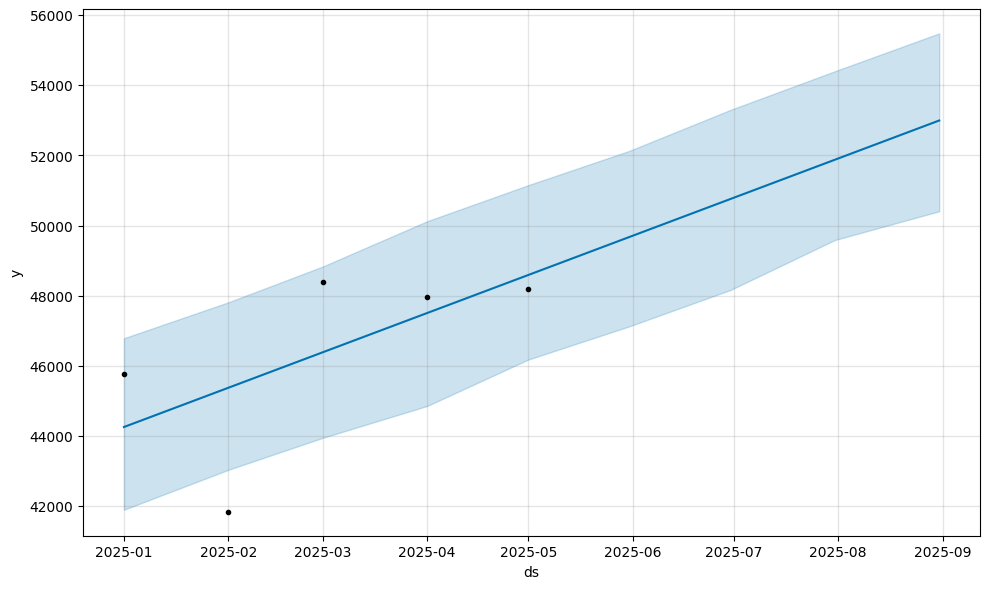

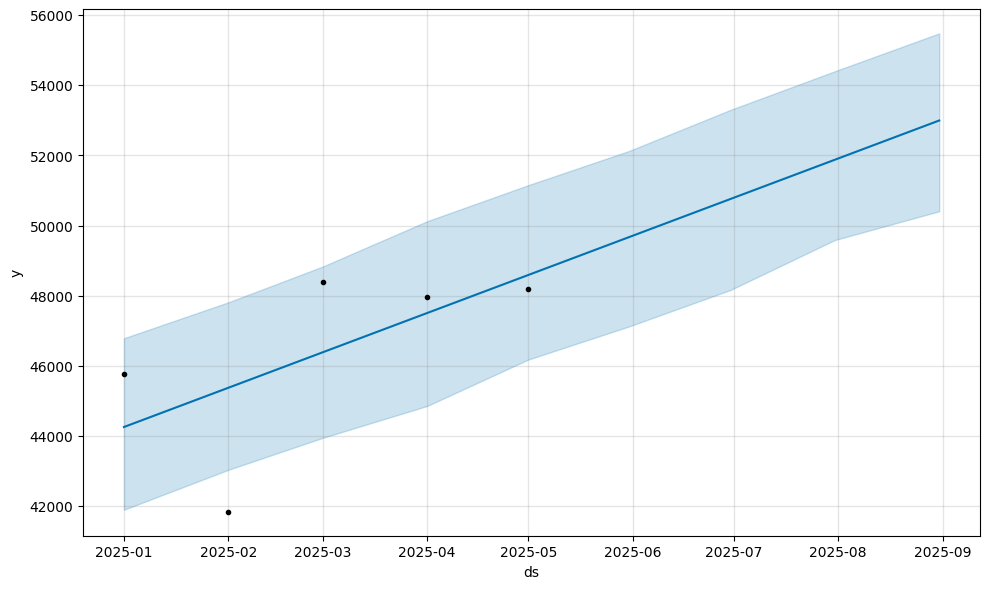

In [47]:
from prophet import Prophet

model = Prophet()
model.fit(monthly_counts)

future = model.make_future_dataframe(periods=4, freq='M')
forecast = model.predict(future)
model.plot(forecast)


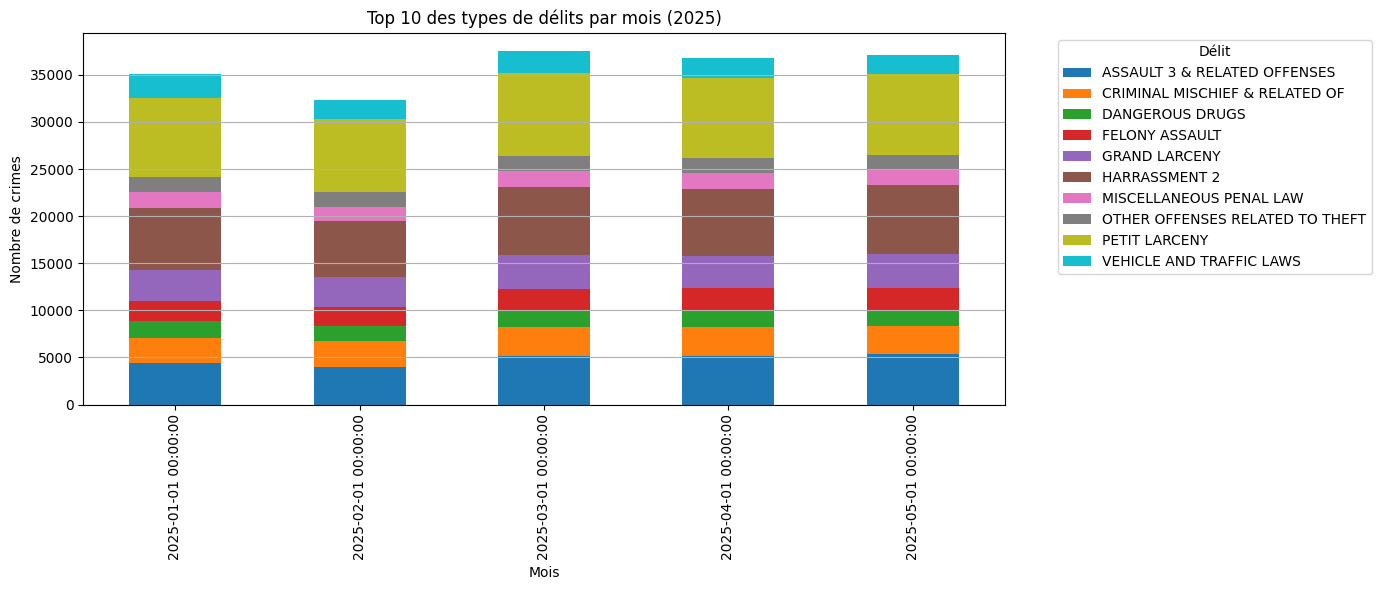

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", low_memory=False)
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors='coerce')

# Garder uniquement la période souhaitée
df = df[(df["CMPLNT_FR_DT"] >= "2025-01-01") & (df["CMPLNT_FR_DT"] <= "2025-05-30")]

# Supprimer les lignes avec types de délits manquants
df = df.dropna(subset=["OFNS_DESC"])

# Extraire le mois
df["month"] = df["CMPLNT_FR_DT"].dt.to_period("M").astype(str)
df["month"] = pd.to_datetime(df["month"])

# Grouper par mois et type de délit
grouped = df.groupby(["month", "OFNS_DESC"]).size().reset_index(name="count")

# Calculer les 10 délits les plus fréquents sur toute la période
top_offenses = grouped.groupby("OFNS_DESC")["count"].sum().nlargest(10).index

# Filtrer pour ne garder que ces 10
grouped_top = grouped[grouped["OFNS_DESC"].isin(top_offenses)]

# Pivot pour bar chart empilé
pivoted = grouped_top.pivot(index="month", columns="OFNS_DESC", values="count").fillna(0)

# Tracer
pivoted.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.xlabel("Mois")
plt.ylabel("Nombre de crimes")
plt.title("Top 10 des types de délits par mois (2025)")
plt.legend(title="Délit", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


C:\Users\jomat\AppData\Local\Temp\ipykernel_2720\2421960069.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


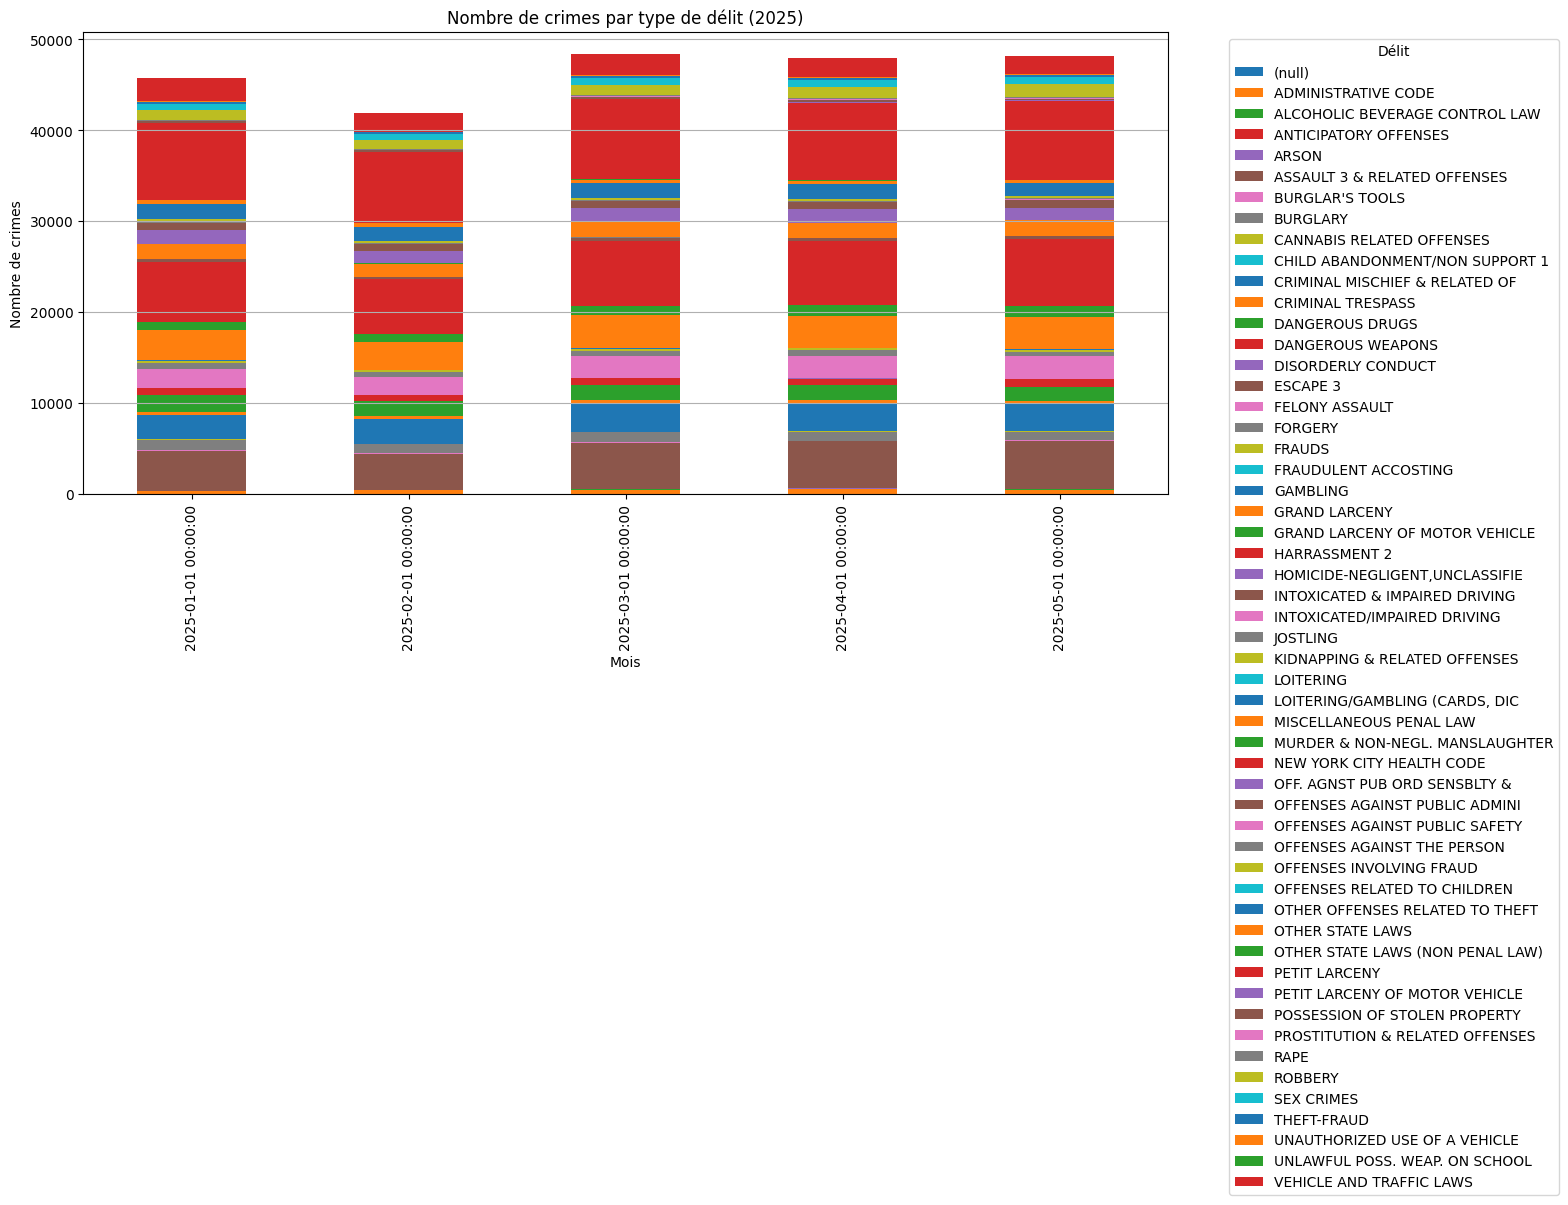

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", low_memory=False)
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors='coerce')

# Garder uniquement la période souhaitée
df = df[(df["CMPLNT_FR_DT"] >= "2025-01-01") & (df["CMPLNT_FR_DT"] <= "2025-05-30")]

# Supprimer les lignes avec types de délits manquants
df = df.dropna(subset=["OFNS_DESC"])

# Extraire le mois
df["month"] = df["CMPLNT_FR_DT"].dt.to_period("M").astype(str)
df["month"] = pd.to_datetime(df["month"])

# Grouper par mois et type de délit
grouped = df.groupby(["month", "OFNS_DESC"]).size().reset_index(name="count")

# Pivot pour avoir les délits en colonnes (facile à tracer en barres empilées)
pivoted = grouped.pivot(index="month", columns="OFNS_DESC", values="count").fillna(0)

# Tracer un bar chart empilé
pivoted.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.xlabel("Mois")
plt.ylabel("Nombre de crimes")
plt.title("Nombre de crimes par type de délit (2025)")
plt.legend(title="Délit", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis='y')
plt.show()